# 🌸 Floranet

---
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it
---

## 🎯 Domain and Objectives

The notebook you are about to read contains a project called Floranet, which aims to classify, through the use of machine learning and deep learning techniques, a dataset containing 102 classes of different flowers. In particular, the dataset used is known as the [Oxford Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html), compiled by Maria-Elena Nilsback and Andrew Zisserman. Each of the 102 classes consists of a variable number ranging from 40 to 258 images per class. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features. Our aim is therefore to investigate the possibilities of building models in order to solve the classification task. In other words, given an image of a flower, we want to be able to correctly identify and recognize the flower in question, minimizing the margin of error as much as possible.

In [1]:
import os
from scipy.io import loadmat
import pandas as pd

# Paths
images_dir = 'Data/images'
labels_path = 'Data/imagelabels.mat'

# Load labels
labels_data = loadmat(labels_path)
labels = labels_data['labels'][0]

# Get images and pair with labels
image_files = sorted([img for img in os.listdir(images_dir) if img.endswith('.jpg')])
data = {'image_name': image_files, 'label': labels[:len(image_files)]}

# Create DataFrame
df = pd.DataFrame(data)

Total number of images: 8189

Number of images per class (ordered by class):
Class 1: 40 images
Class 2: 60 images
Class 3: 40 images
Class 4: 56 images
Class 5: 65 images
Class 6: 45 images
Class 7: 40 images
Class 8: 85 images
Class 9: 46 images
Class 10: 45 images
Class 11: 87 images
Class 12: 87 images
Class 13: 49 images
Class 14: 48 images
Class 15: 49 images
Class 16: 41 images
Class 17: 85 images
Class 18: 82 images
Class 19: 49 images
Class 20: 56 images
Class 21: 40 images
Class 22: 59 images
Class 23: 91 images
Class 24: 42 images
Class 25: 41 images
Class 26: 41 images
Class 27: 40 images
Class 28: 66 images
Class 29: 78 images
Class 30: 85 images
Class 31: 52 images
Class 32: 45 images
Class 33: 46 images
Class 34: 40 images
Class 35: 43 images
Class 36: 75 images
Class 37: 108 images
Class 38: 56 images
Class 39: 41 images
Class 40: 67 images
Class 41: 127 images
Class 42: 59 images
Class 43: 130 images
Class 44: 93 images
Class 45: 40 images
Class 46: 196 images
Class 47

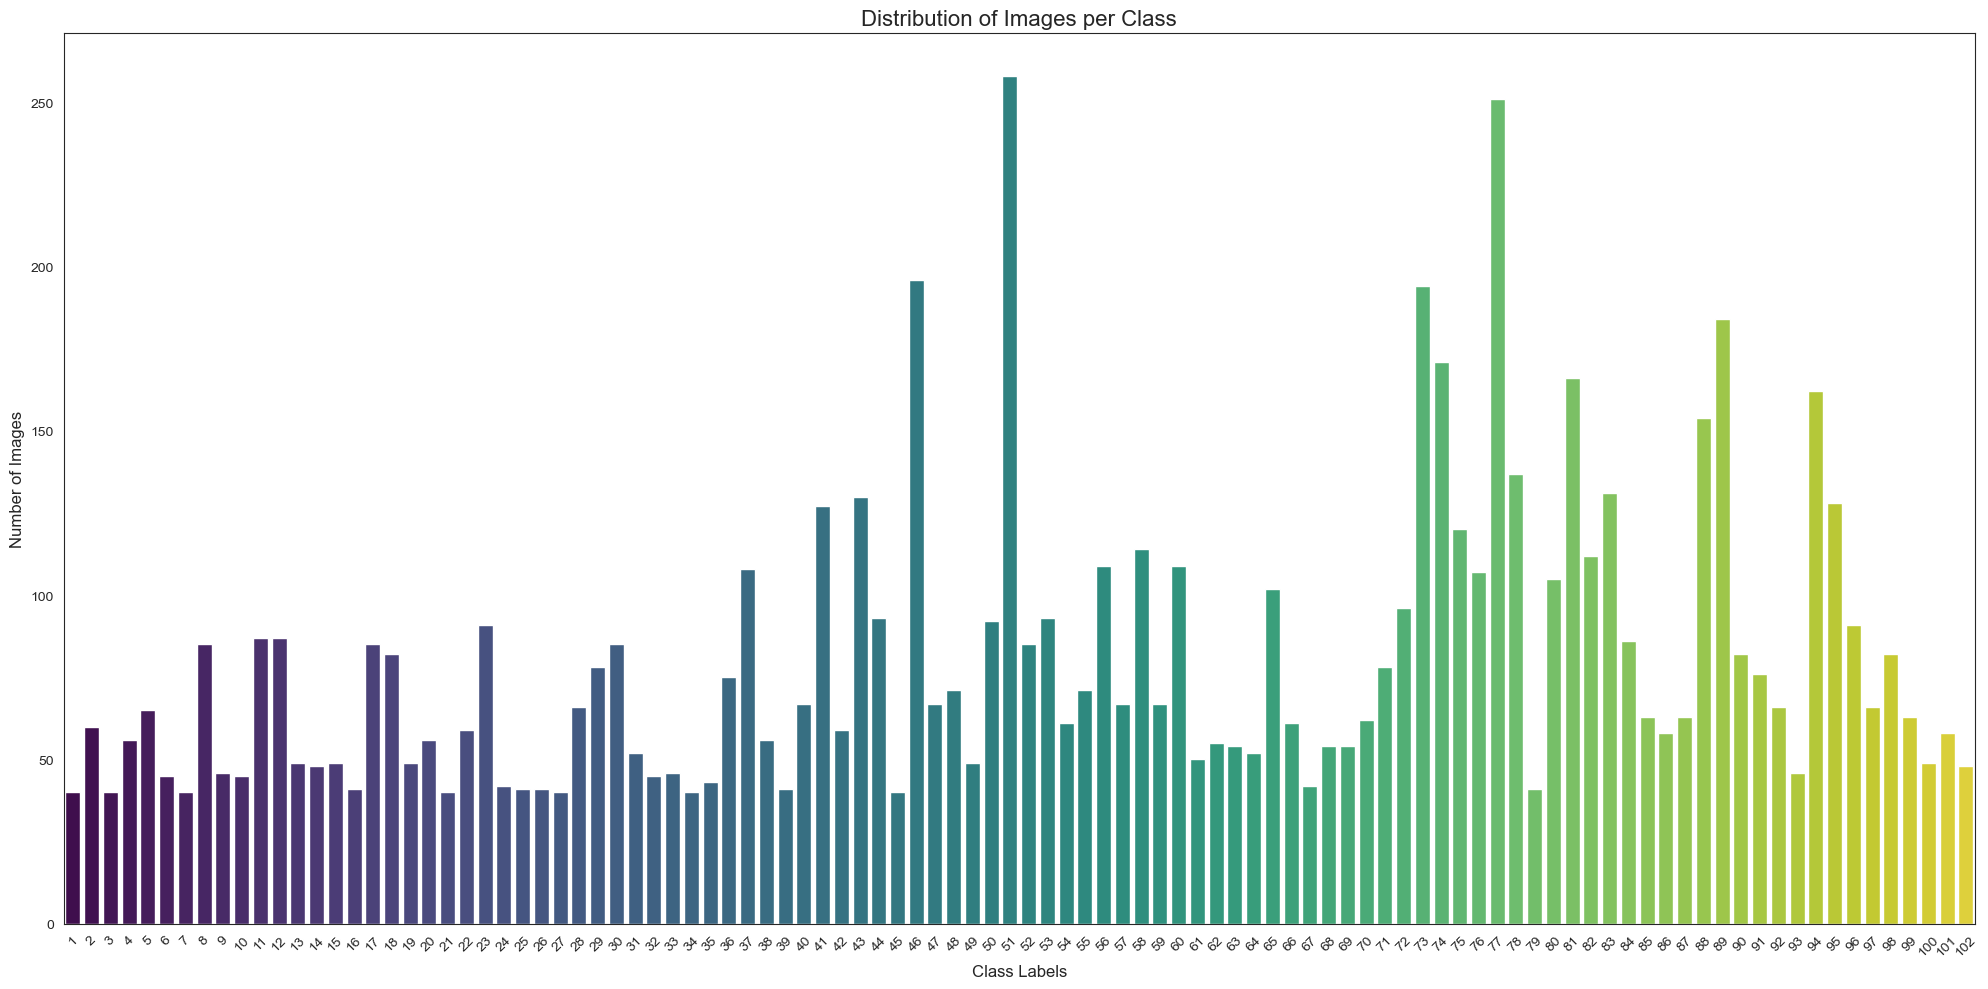

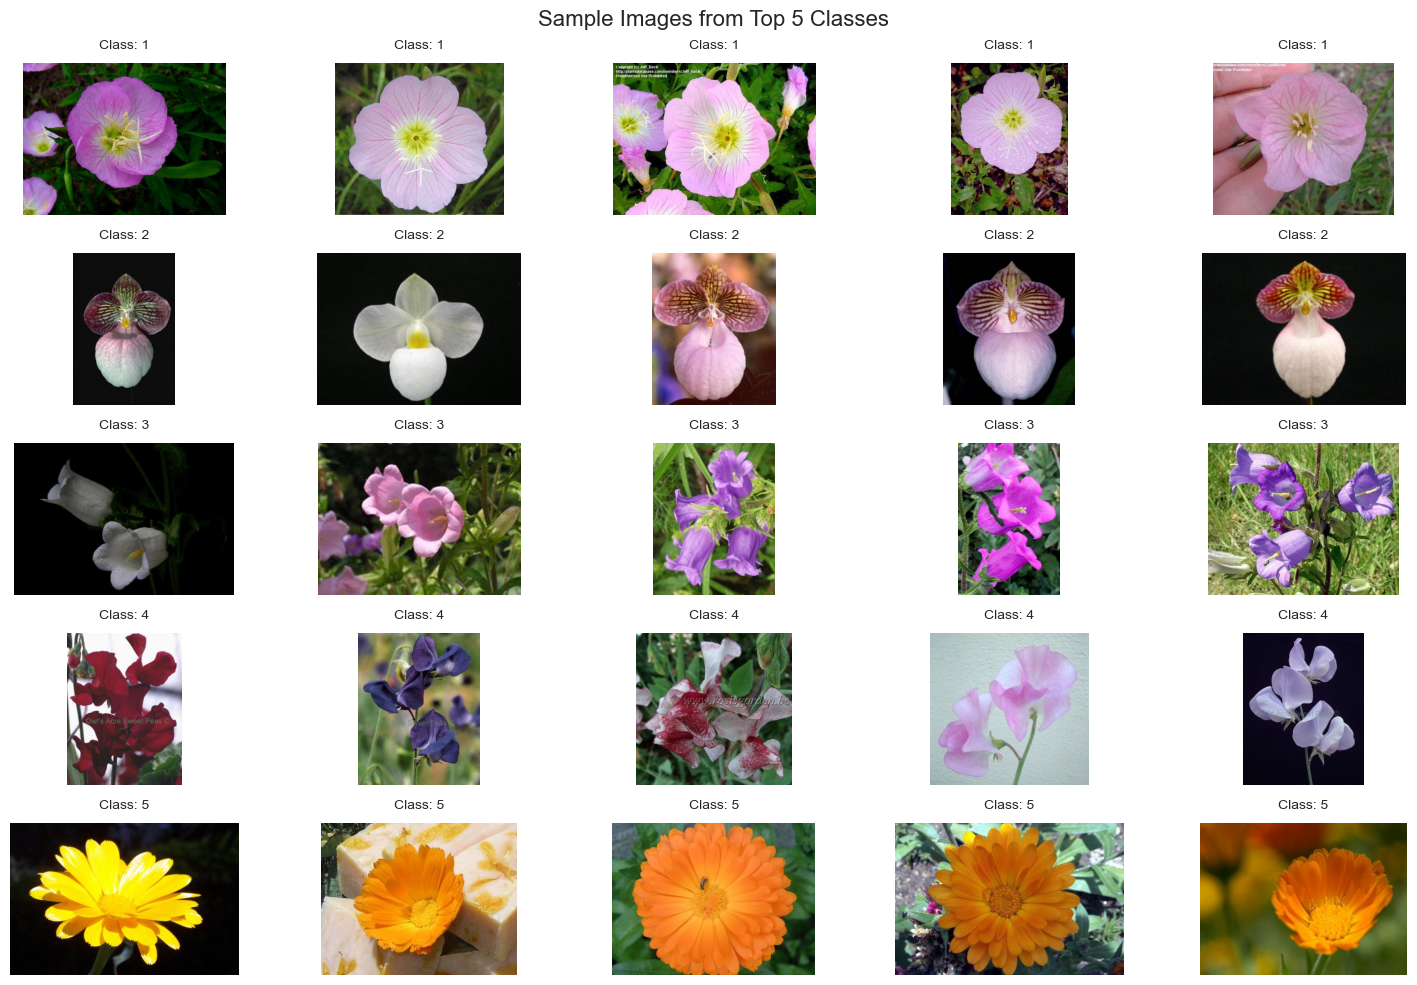

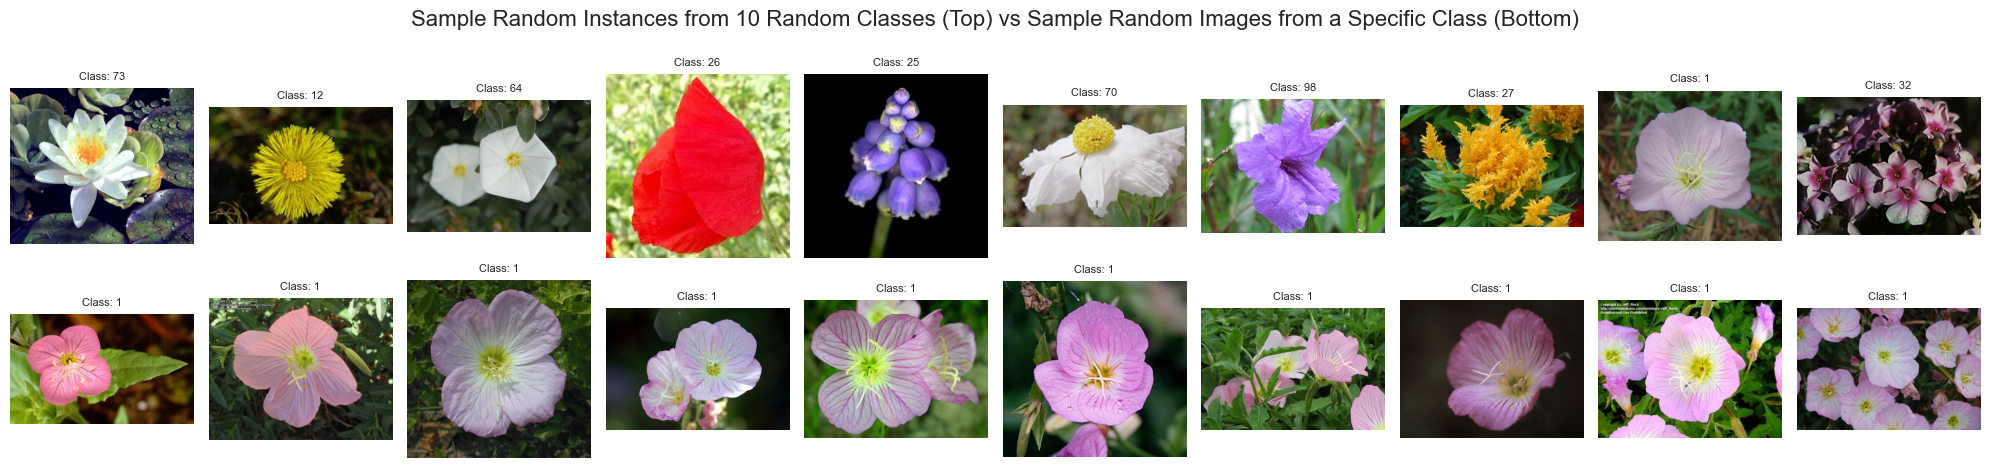

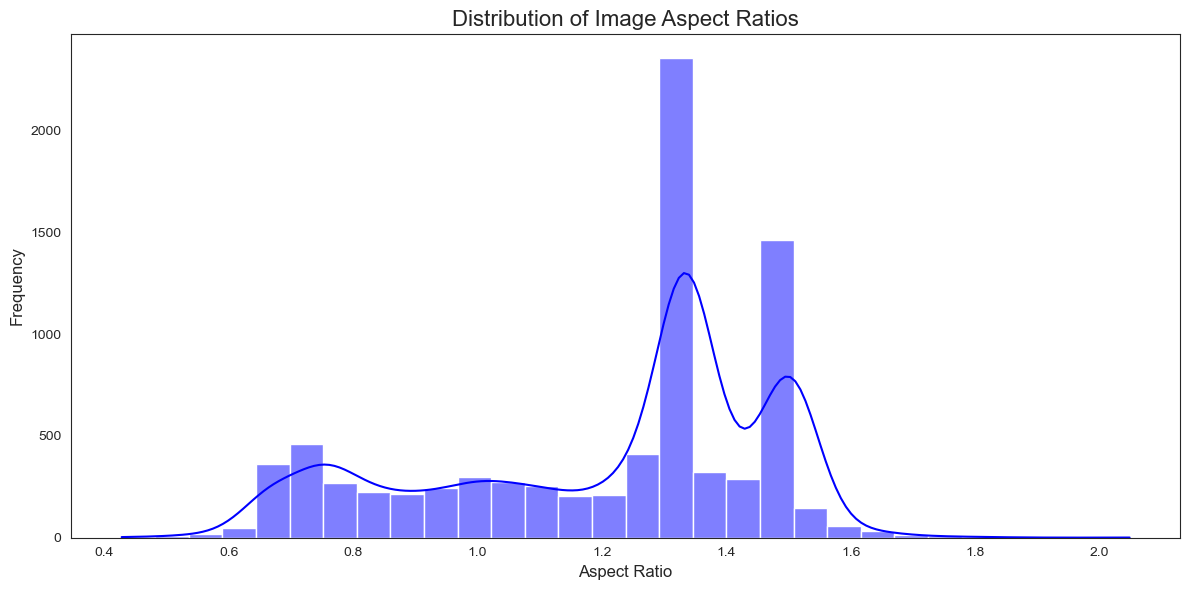


Image Dimension Statistics:
             Width       Height  Aspect Ratio
count  8189.000000  8189.000000   8189.000000
mean    630.160581   534.352058      1.210391
std      95.988254    75.453540      0.270855
min     500.000000   500.000000      0.428082
25%     501.000000   500.000000      1.000000
50%     667.000000   500.000000      1.332000
75%     699.000000   501.000000      1.398000
max    1024.000000  1168.000000      2.048000

Average number of images per class: 80.28


In [32]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Assuming df is the DataFrame and contains 'label' and 'image_name' columns
# Assuming labels contain all unique labels from the dataset

# 1. Number of total images
num_images = len(df)
print(f"Total number of images: {num_images}")

# 2. Number of images per class
images_per_class = df['label'].value_counts().sort_index()  # Sort by class labels
print("\nNumber of images per class (ordered by class):")
for label, count in images_per_class.items():
    print(f"Class {label}: {count} images")

# 3. Plotting distribution of images per class
plt.figure(figsize=(20, 10))  # Increased width and height of the figure
sns.set_style("white")  # Set plot background to white
sns.barplot(x=images_per_class.index, y=images_per_class.values, palette="viridis")
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images per Class', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Displaying sample images for the top 5 classes with most images
top_classes = images_per_class.head(5).index

fig, axes = plt.subplots(len(top_classes), 5, figsize=(15, 10))
for i, label in enumerate(top_classes):
    sample_images = df[df['label'] == label].sample(5)['image_name'].values
    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(images_dir, image_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        # Adding the class label above each image
        axes[i, j].set_title(f"Class: {label}", fontsize=10, pad=10)
plt.suptitle('Sample Images from Top 5 Classes', fontsize=16)
plt.tight_layout()
plt.show()

# Combining 10 random images from random classes and class 1
random_classes = df['label'].drop_duplicates().sample(10).values
class_1_images = df[df['label'] == 1].sample(10)['image_name'].values

fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i, label in enumerate(random_classes):
    image_name = df[df['label'] == label].sample(1)['image_name'].values[0]
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Class: {label}", fontsize=8)

for i, image_name in enumerate(class_1_images):
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("Class: 1", fontsize=8)

plt.suptitle('Sample Random Instances from 10 Random Classes (Top) vs Sample Random Images from a Specific Class (Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

# 5. Computing image dimensions and aspect ratio statistics
image_sizes = []
for image_name in df['image_name']:
    img_path = os.path.join(images_dir, image_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Converting to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
sizes_df['Aspect Ratio'] = sizes_df['Width'] / sizes_df['Height']

# 6. Plotting distribution of aspect ratios
plt.figure(figsize=(12, 6))
sns.histplot(sizes_df['Aspect Ratio'], kde=True, color='blue', bins=30)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image Aspect Ratios', fontsize=16)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nImage Dimension Statistics:")
print(sizes_df.describe())

# 7. Average number of images per class
avg_images_per_class = images_per_class.mean()
print(f"\nAverage number of images per class: {avg_images_per_class:.2f}")